In [69]:
%pip install kagglehub
import kagglehub
import os


path = kagglehub.dataset_download("gregorut/videogamesales")
os.popen(f'cp {path} {os.getcwd()} -r')
# os.popen(f'copy {path} {os.getcwd()} -r') # использовать для windows

Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prophet import Prophet

warnings.filterwarnings('ignore')

In [41]:
data_revenue = pd.read_csv('./2/vgsales.csv')

data_revenue.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
data_revenue.shape

(16598, 11)

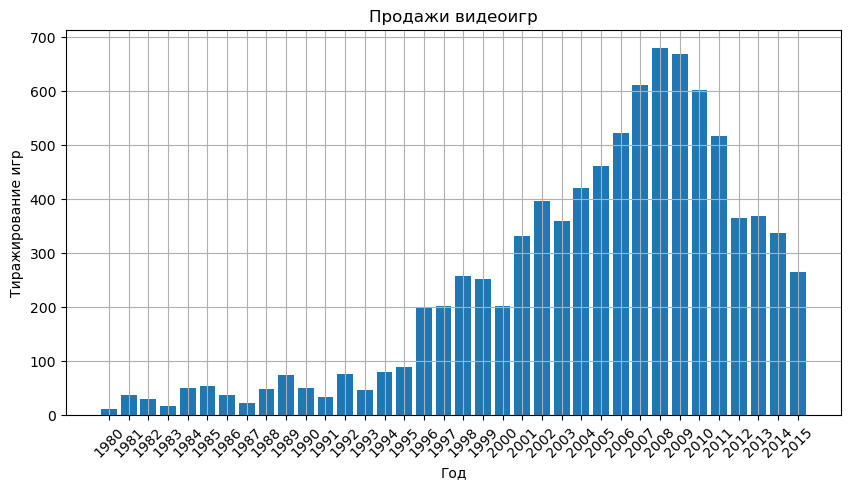

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


In [43]:
data_grouped = data_revenue.groupby('Year')['Global_Sales'].sum().reset_index()
data_grouped = data_grouped[data_grouped['Year'] <= 2015]
data_grouped['Year'] = data_grouped['Year'].astype(int)
plt.figure(figsize=(10, 5))
plt.title('Продажи видеоигр') 
plt.xlabel('Год') 
plt.ylabel('Тиражирование игр') 
plt.grid()

plt.bar(data_grouped['Year'],
            data_grouped['Global_Sales'])

plt.xticks(data_grouped['Year'], rotation = 45)

plt.show()
data_grouped

In [44]:
data_grouped['Year'] = pd.to_datetime(data_grouped['Year'].astype(str) + '-01-01')
train = data_grouped.loc[data_grouped['Year'] < '2010-01-01']
train.columns = ['ds', 'y']
test = data_grouped.loc[data_grouped['Year'] >= '2010-01-01']
test.columns = ['ds', 'y']
train

,ds,y
0,1980-01-01,11.38
1,1981-01-01,35.77
2,1982-01-01,28.86
3,1983-01-01,16.79
4,1984-01-01,50.36
5,1985-01-01,53.94
6,1986-01-01,37.07
7,1987-01-01,21.74
8,1988-01-01,47.22
9,1989-01-01,73.45


In [45]:
test

,ds,y
30,2010-01-01,600.45
31,2011-01-01,515.99
32,2012-01-01,363.54
33,2013-01-01,368.11
34,2014-01-01,337.05
35,2015-01-01,264.44


In [46]:
train_0 = train
test_0 = test

In [47]:
model = Prophet()

model.fit(train_0)

12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = model.make_future_dataframe(periods=5, freq='Y')
future.tail(7)

,ds
28,2008-01-01
29,2009-01-01
30,2009-12-31
31,2010-12-31
32,2011-12-31
33,2012-12-31
34,2013-12-31


In [49]:
forecast = model.predict(future)

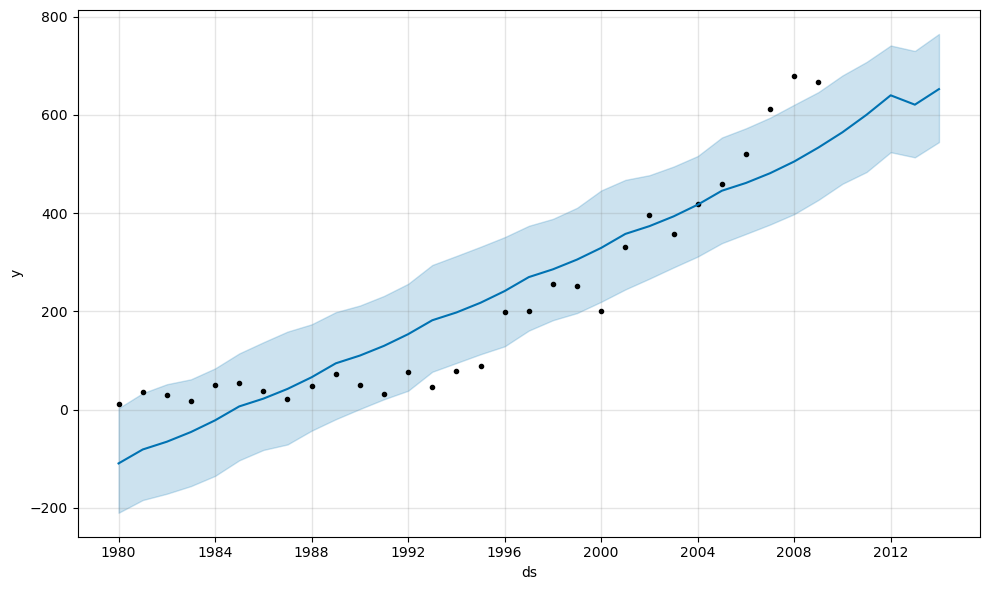

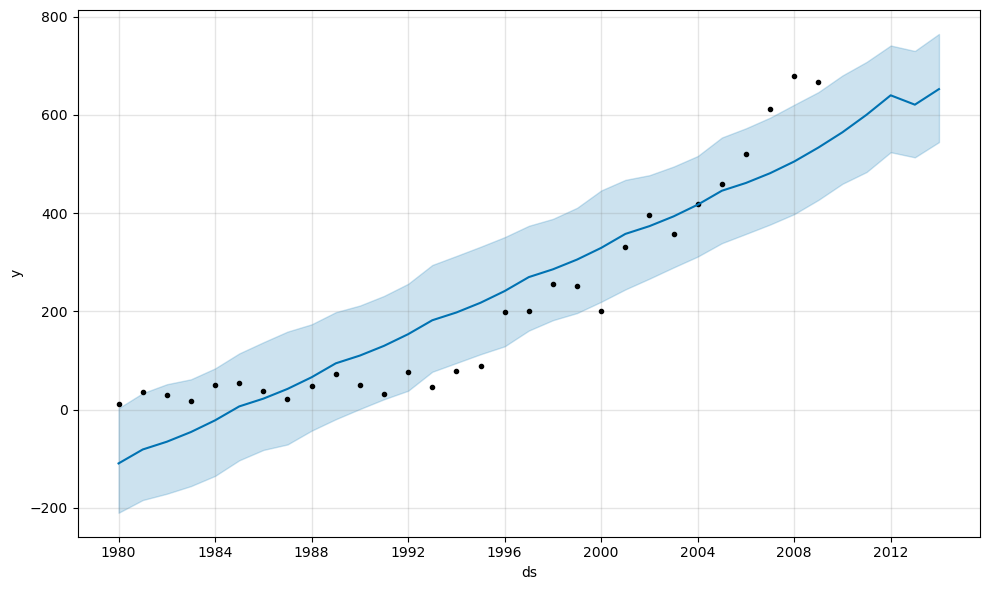

In [50]:
model.plot(forecast)

In [51]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast['yhat'].tail(6), test_0['y'])

215.8972251083762

In [52]:
modul_dif = np.abs(forecast['yhat'] - test_0['y'])

dif = np.mean(modul_dif / test_0['y'])

dif_percent = dif*100

dif_percent

52.09003802190448

In [53]:
final_train = data_grouped
final_train.columns = ['ds', 'y']

In [54]:
predict_model = Prophet()
predict_model.fit(final_train)

12:49:33 - cmdstanpy - INFO - Chain [1] start processing


12:49:33 - cmdstanpy - INFO - Chain [1] done processing


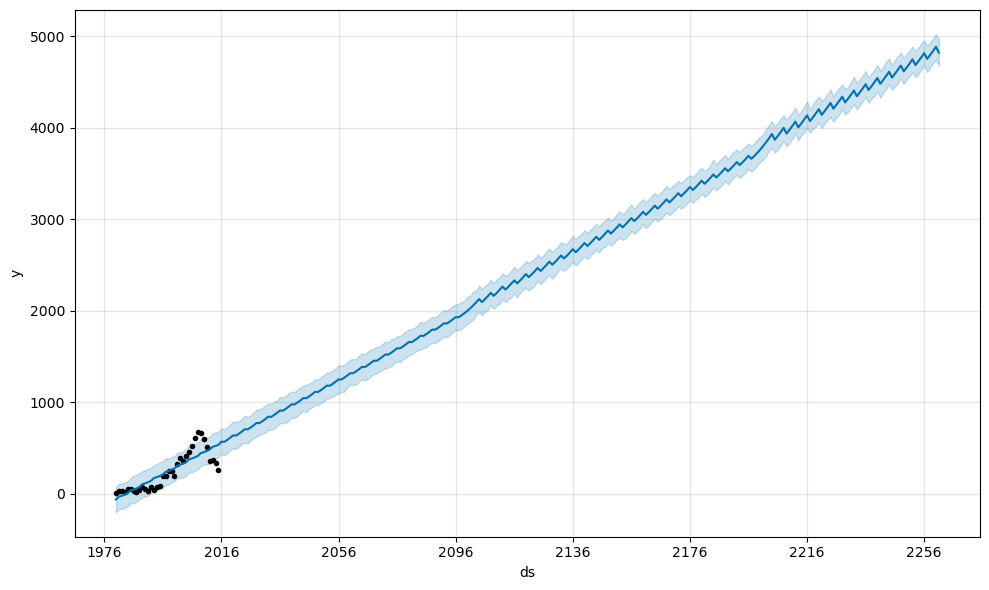

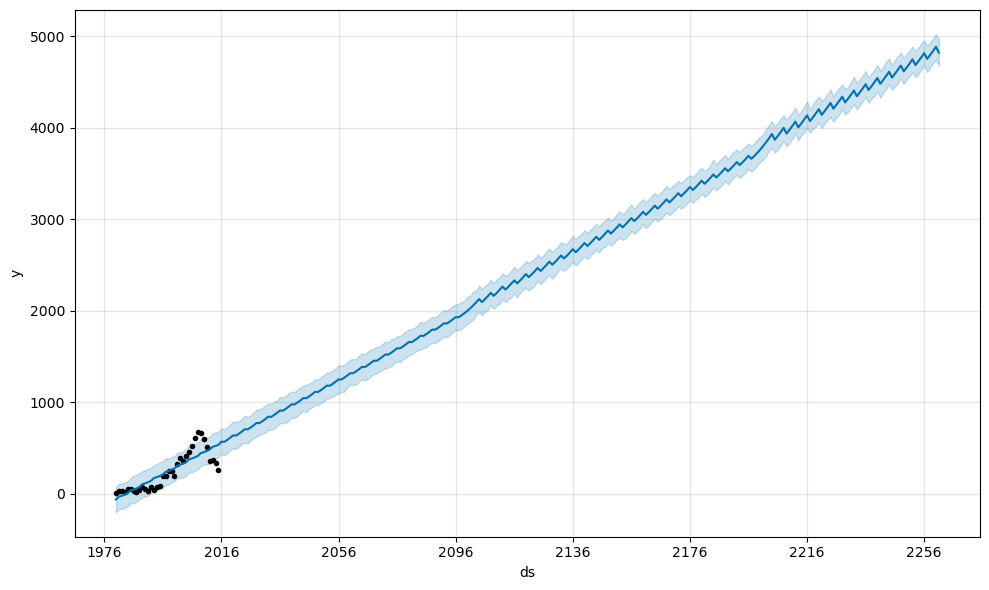

In [68]:
new_future = predict_model.make_future_dataframe(periods=246, freq='Y')
# new_future.tail(7)
new_forecast = predict_model.predict(new_future)
predict_model.plot(new_forecast)

In [ ]:
modul_diff = np.abs(new_forecast.reset_index()['yhat'] - test_0['y'])

diff = np.mean(modul_diff/final_train['y'])

diff_percent = diff*100

diff_percent
# print(0.5)

44.161298537921226